In [1]:
!pip install gensim --upgrade
!pip install pandas --upgrade
!pip install keras--upgrade

ERROR: Could not find a version that satisfies the requirement keras--upgrade (from versions: none)
ERROR: No matching distribution found for keras--upgrade


In [2]:
# DataFrame
import pandas as pd
import gensim 

In [3]:
# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

In [6]:
# Word2vec
import gensim

In [7]:
# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

In [8]:
# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [9]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras import utils
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nupurmehlawat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [13]:
import pandas as pd

# Define the file path
file_path = '/Users/nupurmehlawat/Downloads/training.1600000.processed.noemoticon.csv'

# Read the CSV file
df = pd.read_csv(file_path, header=None, encoding='ISO-8859-1', names=['target', 'id', 'date', 'flag', 'user', 'text'])

# Display the first few rows of the DataFrame
print(df.head())


   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [14]:
print("Dataset size:", len(df))

Dataset size: 1600000


In [15]:
df.head(5)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [17]:
df.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [18]:
df = df.sample(frac=0.1, random_state=42)

In [19]:
df

,target,id,date,flag,user,text
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem
...,...,...,...,...,...,...
1574177,4,2189199207,Mon Jun 15 23:28:21 PDT 2009,NO_QUERY,mainbasket,@willjonz thank you Will
49646,0,1678213724,Sat May 02 05:56:37 PDT 2009,NO_QUERY,MagicElla,@HeartlessHippie AAAAAAAAH what's wrong?!
1317229,4,2014242841,Wed Jun 03 00:53:53 PDT 2009,NO_QUERY,kewlrats,@samhouston Will see you there tomorrow at the...
520455,0,2192116541,Tue Jun 16 06:32:06 PDT 2009,NO_QUERY,iXombie,Forgot that Xbox Live would be down today.


In [20]:
print("modified length of the dataset")
len(df)

modified length of the dataset


160000

In [21]:
# Check if there are any null values in the entire DataFrame
any_null = df.isnull().any().any()

if any_null:
    print("There are null values in the DataFrame.")
else:
    print("No null values found in the DataFrame.")

No null values found in the DataFrame.


In [22]:
#Map target label to String
#0 -> NEGATIVE
#2 -> NEUTRAL
#4 -> POSITIVE

In [23]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [24]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

CPU times: user 16.5 ms, sys: 988 µs, total: 17.5 ms
Wall time: 16.9 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

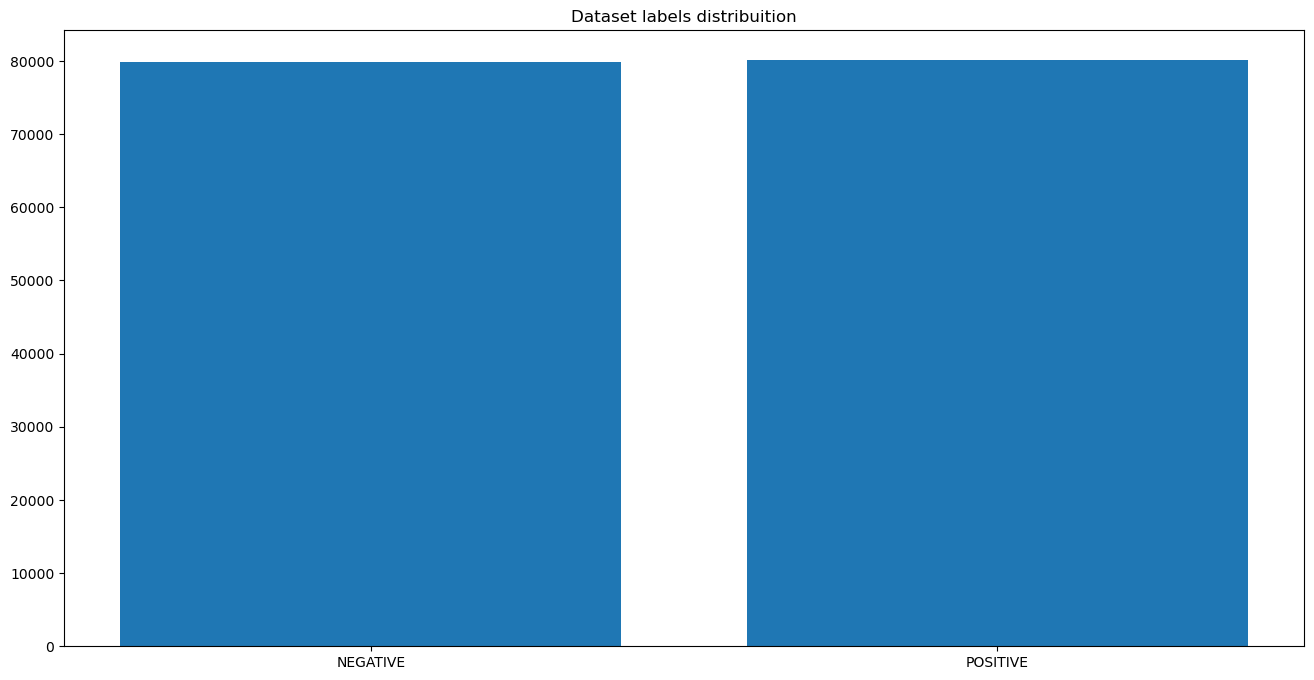

In [25]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [26]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [27]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [28]:
%%time
df.text = df.text.apply(lambda x: preprocess(x))

CPU times: user 1.89 s, sys: 44.1 ms, total: 1.93 s
Wall time: 1.9 s


In [29]:
#Split train and test
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 128000
TEST size: 32000


In [30]:
%%time
documents = [_text.split() for _text in df_train.text] 

CPU times: user 148 ms, sys: 16.3 ms, total: 165 ms
Wall time: 168 ms


In [31]:
from gensim.models import Word2Vec

# Define your hyperparameters
W2V_SIZE = 100
W2V_WINDOW = 5
W2V_MIN_COUNT = 1

# Initialize the Word2Vec model
w2v_model = Word2Vec(vector_size=W2V_SIZE, 
                    window=W2V_WINDOW, 
                    min_count=W2V_MIN_COUNT, 
                    workers=8)

2023-11-20 16:11:31,203 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=100, alpha=0.025>', 'datetime': '2023-11-20T16:11:31.203317', 'gensim': '4.3.0', 'python': '3.11.4 (main, Jul  5 2023, 08:54:11) [Clang 14.0.6 ]', 'platform': 'macOS-13.3-arm64-arm-64bit', 'event': 'created'}


In [32]:
w2v_model.build_vocab(documents)

2023-11-20 16:11:31,205 : INFO : collecting all words and their counts
2023-11-20 16:11:31,206 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-11-20 16:11:31,213 : INFO : PROGRESS: at sentence #10000, processed 71590 words, keeping 13861 word types
2023-11-20 16:11:31,220 : INFO : PROGRESS: at sentence #20000, processed 143892 words, keeping 21396 word types
2023-11-20 16:11:31,227 : INFO : PROGRESS: at sentence #30000, processed 216288 words, keeping 27492 word types
2023-11-20 16:11:31,234 : INFO : PROGRESS: at sentence #40000, processed 288618 words, keeping 32874 word types
2023-11-20 16:11:31,241 : INFO : PROGRESS: at sentence #50000, processed 360393 words, keeping 37717 word types
2023-11-20 16:11:31,248 : INFO : PROGRESS: at sentence #60000, processed 433168 words, keeping 42366 word types
2023-11-20 16:11:31,255 : INFO : PROGRESS: at sentence #70000, processed 504666 words, keeping 46531 word types
2023-11-20 16:11:31,263 : INFO : PROGRESS: at s

In [33]:
words = list(w2v_model.wv.key_to_index.keys())
vocab_size = len(words)
print("Vocab size:", vocab_size)

Vocab size: 67703


In [34]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

2023-11-20 16:11:31,692 : INFO : Word2Vec lifecycle event {'msg': 'training model with 8 workers on 67703 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2023-11-20T16:11:31.692710', 'gensim': '4.3.0', 'python': '3.11.4 (main, Jul  5 2023, 08:54:11) [Clang 14.0.6 ]', 'platform': 'macOS-13.3-arm64-arm-64bit', 'event': 'train'}
2023-11-20 16:11:31,974 : INFO : EPOCH 0: training on 924127 raw words (872143 effective words) took 0.3s, 3207531 effective words/s
2023-11-20 16:11:32,244 : INFO : EPOCH 1: training on 924127 raw words (871940 effective words) took 0.3s, 3322704 effective words/s
2023-11-20 16:11:32,508 : INFO : EPOCH 2: training on 924127 raw words (871982 effective words) took 0.3s, 3414327 effective words/s
2023-11-20 16:11:32,765 : INFO : EPOCH 3: training on 924127 raw words (872645 effective words) took 0.2s, 3502966 effective words/s
2023-11-20 16:11:33,027 : INFO : EPOCH 4: training on 924127 raw words (872

CPU times: user 38.1 s, sys: 391 ms, total: 38.5 s
Wall time: 8.63 s


(27911364, 29572064)

In [35]:
from gensim.models import Word2Vec

# Assuming 'w2v_model' is a valid Word2Vec model
# If not, make sure to load your Word2Vec model properly

# Check if the model has the 'most_similar' method
if hasattr(w2v_model, 'wv') and hasattr(w2v_model.wv, 'most_similar'):
    similar_words = w2v_model.wv.most_similar("love")
    print(similar_words)
else:
    print("The model does not have the 'most_similar' method.")


[('luv', 0.5117961168289185), ('loves', 0.4890754520893097), ('tfp', 0.4411761164665222), ('selena', 0.42257967591285706), ('single', 0.4086487293243408), ('immediatly', 0.4073946177959442), ('lov', 0.4046597182750702), ('awesome', 0.3979400396347046), ('andremulas', 0.395564466714859), ('ubderstandable', 0.38997384905815125)]


In [36]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 67704
CPU times: user 1.51 s, sys: 774 ms, total: 2.29 s
Wall time: 704 ms


In [37]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

CPU times: user 756 ms, sys: 20.4 ms, total: 776 ms
Wall time: 775 ms


In [38]:
#Label Encoder
labels = df_train.target.unique().tolist()
labels.append(NEUTRAL)
labels

['NEGATIVE', 'POSITIVE', 'NEUTRAL']

In [39]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (128000, 1)
y_test (32000, 1)


In [40]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (128000, 300)
y_train (128000, 1)

x_test (32000, 300)
y_test (32000, 1)


In [41]:
y_train[:10]

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [42]:
#Embedding layer
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(67704, 100)


In [43]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [44]:
#Build Model
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          6770400   
                                                                 
 dropout (Dropout)           (None, 300, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 6850901 (26.13 MB)
Trainable params: 80501 (314.46 KB)
Non-trainable params: 6770400 (25.83 MB)
_________________________________________________________________


In [45]:
#Compile model
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [46]:
#Callbacks
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [47]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=2,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/2
113/113 [==============================] - ETA: 0s - loss: 0.5941 - accuracy: 0.6786

2023-11-20 16:15:33,000 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


113/113 [==============================] - 231s 2s/step - loss: 0.5941 - accuracy: 0.6786 - val_loss: 0.5248 - val_accuracy: 0.7371 - lr: 0.0010
Epoch 2/2
113/113 [==============================] - ETA: 0s - loss: 0.5583 - accuracy: 0.7117

2023-11-20 16:19:58,603 : WARNING : Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


113/113 [==============================] - 266s 2s/step - loss: 0.5583 - accuracy: 0.7117 - val_loss: 0.5114 - val_accuracy: 0.7490 - lr: 0.0010
CPU times: user 18min 19s, sys: 9min 14s, total: 27min 34s
Wall time: 8min 16s


In [48]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

32/32 [==============================] - 14s 431ms/step - loss: 0.5059 - accuracy: 0.7495

ACCURACY: 0.7494687438011169
LOSS: 0.5059211850166321
CPU times: user 37.1 s, sys: 10.6 s, total: 47.7 s
Wall time: 13.8 s


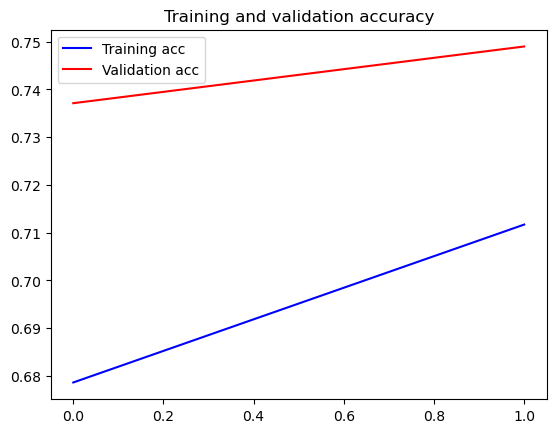

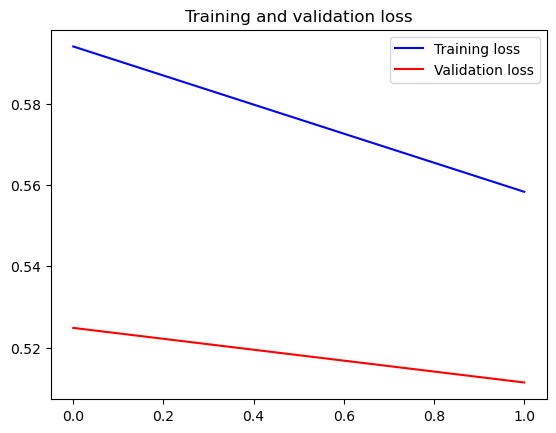

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [50]:
#predict

def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [51]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [52]:
predict("I love the music")

1/1 [==============================] - 0s 116ms/step


{'label': 'POSITIVE',
 'score': 0.9206539988517761,
 'elapsed_time': 0.13188600540161133}

In [53]:
predict("I hate the rain")

1/1 [==============================] - 0s 22ms/step


{'label': 'NEGATIVE',
 'score': 0.0369025319814682,
 'elapsed_time': 0.032367706298828125}

In [54]:
predict("i don't know what i'm doing")

1/1 [==============================] - 0s 23ms/step


{'label': 'NEUTRAL',
 'score': 0.5958064794540405,
 'elapsed_time': 0.034928083419799805}

In [55]:
predict("i am great")

1/1 [==============================] - 0s 18ms/step


{'label': 'POSITIVE',
 'score': 0.9260262846946716,
 'elapsed_time': 0.02850484848022461}

In [56]:
predict("can I get a coffee please?")

1/1 [==============================] - 0s 19ms/step


{'label': 'NEUTRAL',
 'score': 0.64421546459198,
 'elapsed_time': 0.029802799224853516}

In [57]:
predict("okay")

1/1 [==============================] - 0s 20ms/step


{'label': 'NEUTRAL',
 'score': 0.6133173108100891,
 'elapsed_time': 0.031167984008789062}

In [58]:
predict("She is a very famous poet.")

1/1 [==============================] - 0s 18ms/step


{'label': 'POSITIVE',
 'score': 0.7788771986961365,
 'elapsed_time': 0.029169082641601562}

In [68]:
predict("I am fine, it okay")

1/1 [==============================] - 0s 29ms/step


{'label': 'NEUTRAL',
 'score': 0.6942625641822815,
 'elapsed_time': 0.057975053787231445}

In [ ]:
predict("She was crying the other night")

In [69]:
predict("I am very happy.")

1/1 [==============================] - 0s 27ms/step


{'label': 'POSITIVE',
 'score': 0.907697319984436,
 'elapsed_time': 0.05856490135192871}

In [70]:
predict("I have no idea")

1/1 [==============================] - 0s 32ms/step


{'label': 'NEUTRAL',
 'score': 0.5775372982025146,
 'elapsed_time': 0.061428070068359375}

In [59]:
#Confusion Matrix

In [60]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

4/4 [==============================] - 7s 2s/step
CPU times: user 40.5 s, sys: 5.68 s, total: 46.2 s
Wall time: 7.35 s


In [61]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

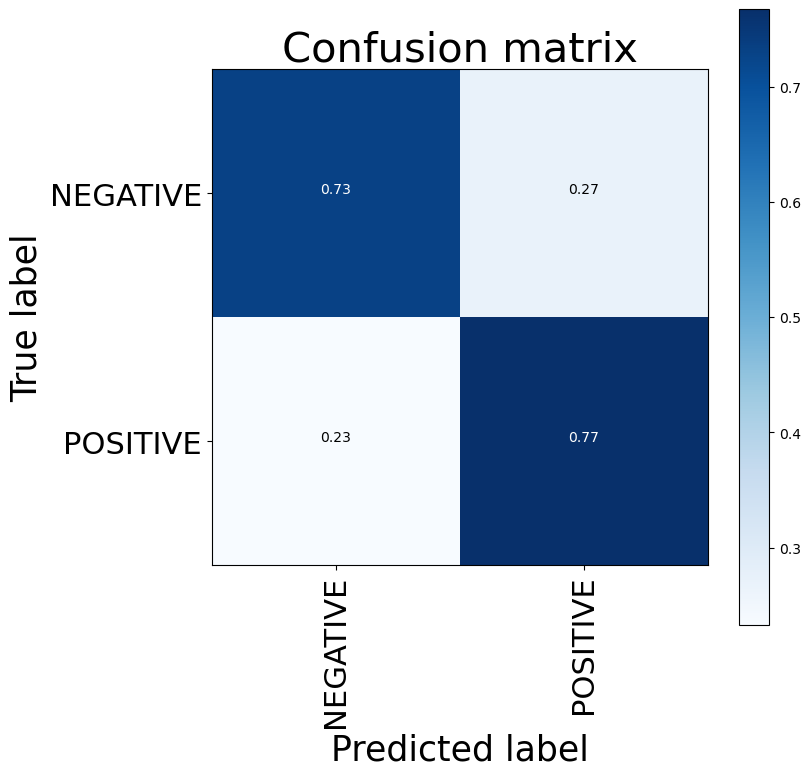

CPU times: user 232 ms, sys: 18.6 ms, total: 251 ms
Wall time: 136 ms


In [62]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")
plt.show()

In [63]:
#classification report

print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

    NEGATIVE       0.76      0.73      0.74     15878
    POSITIVE       0.74      0.77      0.76     16122

    accuracy                           0.75     32000
   macro avg       0.75      0.75      0.75     32000
weighted avg       0.75      0.75      0.75     32000



In [64]:
#Accuracy Score

accuracy_score(y_test_1d, y_pred_1d)

0.74946875

In [65]:
# Save model

model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)

/Users/nupurmehlawat/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2023-11-20 16:20:20,683 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'model.w2v', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-11-20T16:20:20.683301', 'gensim': '4.3.0', 'python': '3.11.4 (main, Jul  5 2023, 08:54:11) [Clang 14.0.6 ]', 'platform': 'macOS-13.3-arm64-arm-64bit', 'event': 'saving'}
2023-11-20 16:20:20,683 : INFO : not storing attribute cum_table
2023-11-20 16:20:20,743 : INFO : saved model.w2v
